In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cryptocurrency Analysis, Currency price analysis
### get request to get data useing API
API: 'https://min-api.cryptocompare.com/data/histo'

API documentation : https://min-api.cryptocompare.com/documentation

- Bitcoin: BTC, Ethereum: ETH, Litecoin: LTC

- First, let’s download hourly data for BTC, ETH, and LTC from Coinbase exchange. This time we work with an hourly time interval as it has higher granularity. Cryptocompare API limits response to 2000 samples, which is 2.7 months of data for each coin.

- The cryptocompare API returns the following columns:
> - open, the price at which the period opened,
> - high, the highest price reached during the period,
> - low, the lowest price reached during the period,
> - close, the price at which the period closed,
> - volumefrom, the volume in the base currency that things are traded into,
> - volumeto, the volume in the currency that is being traded.

- We download the data and store it to a file.
- output of API is data in json format
- output does not have any nan value.
- we remove records with zero value in all columns.

In [2]:
import requests
from datetime import datetime

def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)

def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,\
        'datetime_interval should be one of %s' % supported_intervals
    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    base_url = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (base_url, datetime_interval)
    params = {'fsym': from_symbol, 'tsym': to_symbol,
              'limit': 2000, 'aggregate': 1,
              'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data

def convert_to_dataframe(data):
    df = pd.io.json.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df

def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    print('Filtering %d empty datapoints' % indices.shape[0])
    df = df.drop(indices)
    return df


## read BTC data, visualize output style

In [3]:
from_symbol, to_symbol, exchange, datetime_interval = 'BTC', 'USD', 'Coinbase', 'hour'
data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
data['Data'][0]

{'close': 39981.86,
 'conversionSymbol': '',
 'conversionType': 'force_direct',
 'high': 40117.74,
 'low': 39914.98,
 'open': 39989.4,
 'time': 1627614000,
 'volumefrom': 282.49,
 'volumeto': 11305403.17}

- time is timestamp of a hour in past 2.7 month. we need to convert this to DateTime.
- in this analysis, our index is date. we want to research about change of cryptocurrencies price over time.

### read BTC data

In [4]:
from_symbol, to_symbol, exchange, datetime_interval = 'BTC', 'USD', 'Coinbase', 'hour'
data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
df = convert_to_dataframe(data)
df = filter_empty_datapoints(df)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
df.to_csv(filename, index=False)

Filtering 0 empty datapoints
Saving data to BTC_USD_Coinbase_hour_2021-10-21.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


### read ETH data

In [5]:
from_symbol, to_symbol, exchange, datetime_interval = 'ETH', 'USD', 'Coinbase', 'hour'
data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
df = convert_to_dataframe(data)
df = filter_empty_datapoints(df)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
df.to_csv(filename, index=False)

Filtering 0 empty datapoints
Saving data to ETH_USD_Coinbase_hour_2021-10-21.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


### read LTC data

In [6]:
from_symbol, to_symbol, exchange, datetime_interval = 'LTC', 'USD', 'Coinbase', 'hour'
data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
df = convert_to_dataframe(data)
df = filter_empty_datapoints(df)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
df.to_csv(filename, index=False)

Filtering 0 empty datapoints
Saving data to LTC_USD_Coinbase_hour_2021-10-21.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


## read csv dataset files

In [7]:
def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.datetime) # change to datetime
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

In [8]:
df_btc = read_dataset('BTC_USD_Coinbase_hour_2021-10-21.csv')
df_eth = read_dataset('ETH_USD_Coinbase_hour_2021-10-21.csv')
df_ltc = read_dataset('LTC_USD_Coinbase_hour_2021-10-21.csv')
df_btc.head()

Reading data from BTC_USD_Coinbase_hour_2021-10-21.csv
(2001, 6)
Reading data from ETH_USD_Coinbase_hour_2021-10-21.csv
(2001, 6)
Reading data from LTC_USD_Coinbase_hour_2021-10-21.csv
(2001, 6)


,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2021-07-30 03:00:00,39914.98,40117.74,39989.40,39981.86,282.49,11305403.17
2021-07-30 04:00:00,39660.51,40050.42,39981.86,39824.58,328.91,13116625.91
2021-07-30 05:00:00,39640.35,39842.68,39824.58,39743.00,206.10,8190025.08
2021-07-30 06:00:00,39605.00,39865.23,39743.00,39858.48,225.11,8942770.89
2021-07-30 07:00:00,39659.13,39900.00,39858.48,39737.37,295.45,11762326.76


## Extract closing prices, create closing price dataframe

- We are going to analyze closing prices, which are prices at which the hourly period closed. We merge BTC, ETH and LTC closing prices to a Dataframe to make analysis easier.

In [9]:
df = pd.DataFrame({'BTC': df_btc.close,
                   'ETH': df_eth.close,
                   'LTC': df_ltc.close})

df.to_csv('closing_price_BTC_ETH_LTC.csv')
df.head()

,BTC,ETH,LTC
datetime,,,
2021-07-30 03:00:00,39981.86,2423.13,142.77
2021-07-30 04:00:00,39824.58,2415.75,142.40
2021-07-30 05:00:00,39743.00,2404.12,141.50
2021-07-30 06:00:00,39858.48,2413.50,141.98
2021-07-30 07:00:00,39737.37,2404.29,141.54


## Histogram of BTC closing price
- Let’s estimate the frequency distribution of LTC closing prices. The histogram shows the number of hours LTC had a certain value.

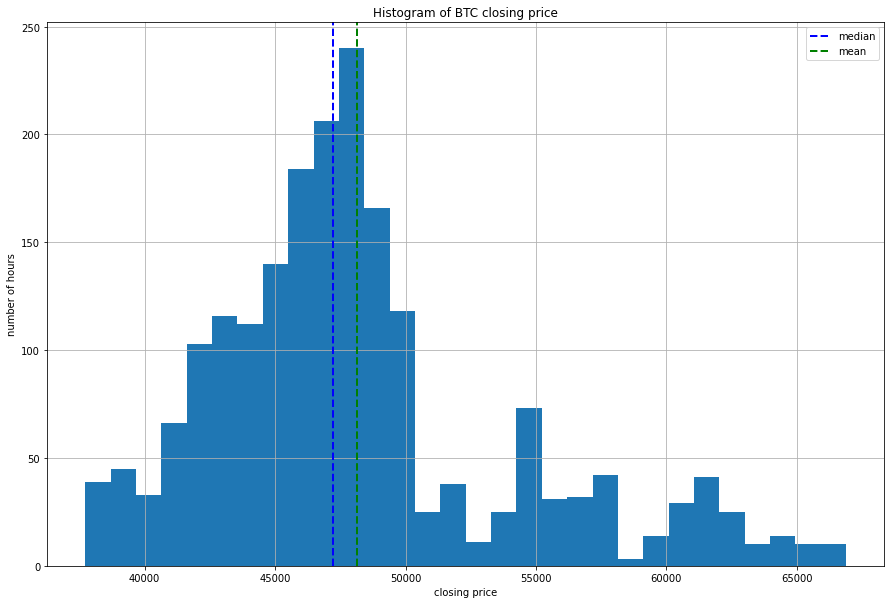

In [10]:
hist_plot = df['BTC'].hist(bins=30, figsize=(15,10))
hist_plot.axvline(df['BTC'].median(), color='b', linestyle='dashed', linewidth=2, label= 'median')
hist_plot.axvline(df['BTC'].mean(), color='g', linestyle='dashed', linewidth=2, label='mean')
plt.xlabel('closing price')
plt.ylabel('number of hours')
plt.title('Histogram of BTC closing price')
plt.legend();

observations
- BTC closing price was not over \$50000 for many hours.
- it has right-skewed distribution because a natural limit prevents outcomes on one side.
- blue dashed line (median) shows that half of the time closing prices were under \$47500.

## Visualize absolute closing prices, Currency price association analysis
- The chart below shows the absolute closing prices. It is not of much use as BTC closing prices are much higher than prices of ETH and LTC.

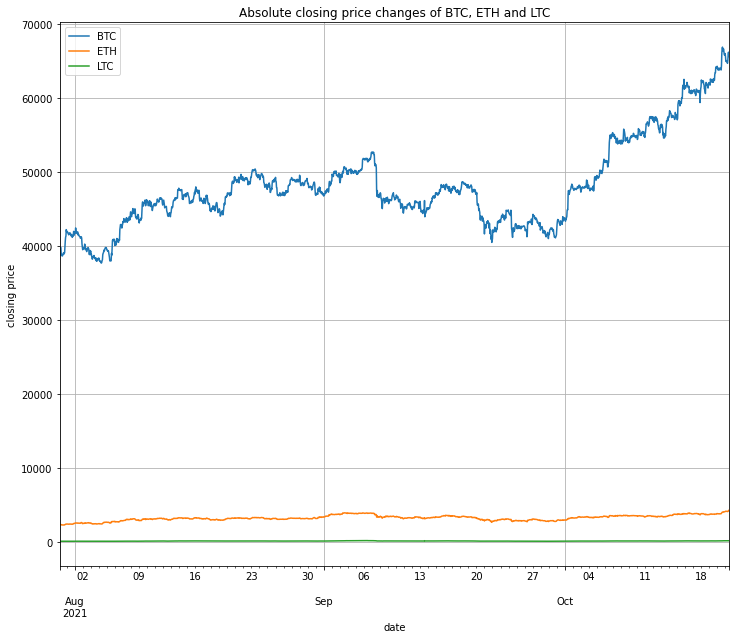

In [11]:
df.plot(grid=True, figsize=(12, 10))
plt.ylabel('closing price')
plt.xlabel('date')
plt.title('Absolute closing price changes of BTC, ETH and LTC');

## Visualize relative changes of closing prices, Currency price association analysis

- We are interested in a relative change of the price rather than in absolute price, so we use three different scales.

- We see that closing prices move in tandem. When one coin closing price increases so do the other.

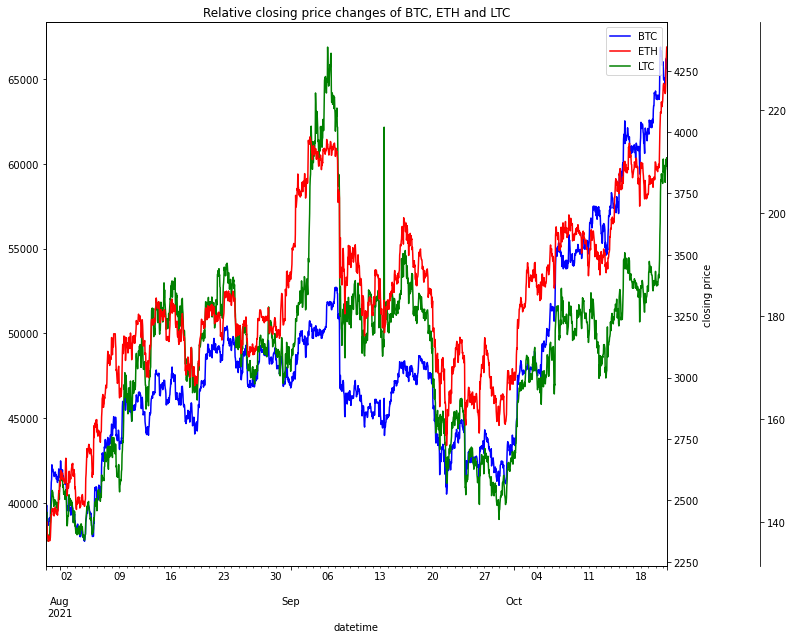

In [12]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df['BTC'].plot(ax=ax1, style='b-')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
df['LTC'].plot(ax=ax2, style='g-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])
plt.ylabel('closing price')
plt.xlabel('date')
plt.title('Relative closing price changes of BTC, ETH and LTC');

also, we can use min-max scale of currency price

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.head()

,BTC,ETH,LTC
datetime,,,
2021-07-30 03:00:00,0.077421,0.044467,0.067493
2021-07-30 04:00:00,0.072028,0.040800,0.063639
2021-07-30 05:00:00,0.069232,0.035021,0.054265
2021-07-30 06:00:00,0.073191,0.039682,0.059265
2021-07-30 07:00:00,0.069038,0.035106,0.054682


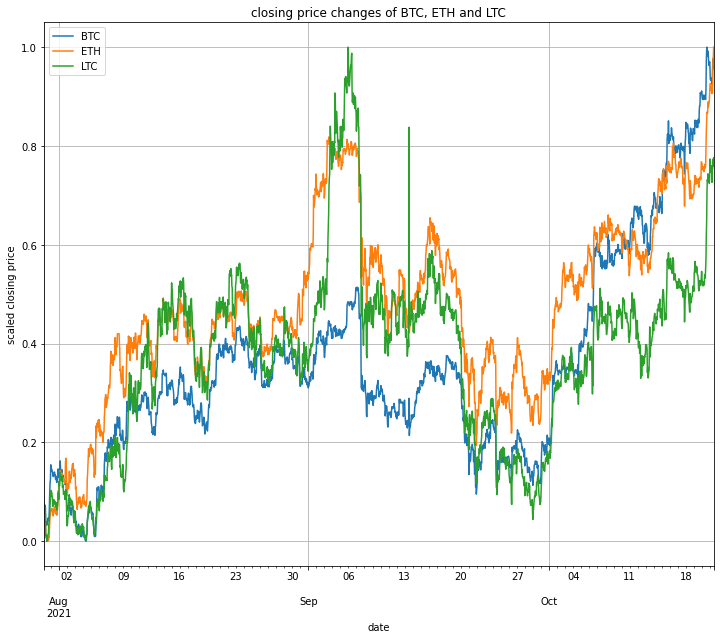

In [14]:
df_scaled.plot(grid=True, figsize=(12, 10))
plt.ylabel('scaled closing price')
plt.xlabel('date')
plt.title('closing price changes of BTC, ETH and LTC');

It seems that BTC, ETH and LTC were highly correlated in the past 2 months. This means, when BTC closing price increased, ETH and LTC followed. We obtain currency price pairs correlation to investigate this.

In [15]:
# Compute the correlation matrix
df.corr()

,BTC,ETH,LTC
BTC,1.000000,0.843884,0.663957
ETH,0.843884,1.000000,0.880341
LTC,0.663957,0.880341,1.000000


The correlation value of each currency price pair is positive and close to 1. These values ​​indicate a strong positive linear relationship between currency pairs. That is, as the price of one increases, the price of other currencies also increases.

## analyze returns

Let’s analyze returns for the past 2.7 months. We calculate the return percentage, where i represents a certain period and price(0) is the initial closing price:

                  return(i,0) = price(i)/price(0) 

In [16]:
df_return = df.apply(lambda x: x / x[0])
df_return.head()

,BTC,ETH,LTC
datetime,,,
2021-07-30 03:00:00,1.000000,1.000000,1.000000
2021-07-30 04:00:00,0.996066,0.996954,0.997408
2021-07-30 05:00:00,0.994026,0.992155,0.991105
2021-07-30 06:00:00,0.996914,0.996026,0.994467
2021-07-30 07:00:00,0.993885,0.992225,0.991385


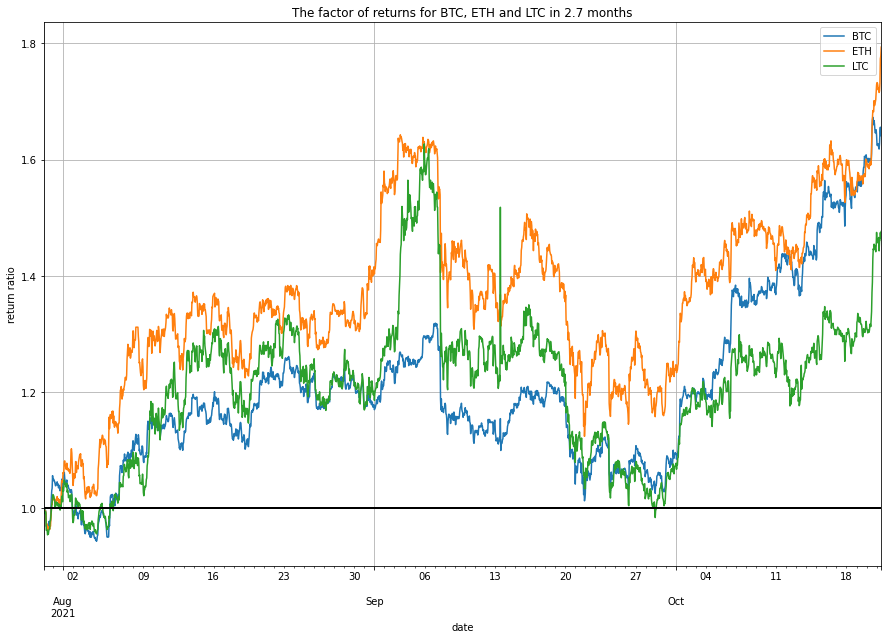

In [17]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)
plt.xlabel('date')
plt.ylabel('return ratio')
plt.title('The factor of returns for BTC, ETH and LTC in 2.7 months');

The cryptocurrencies we analyzed fluctuated a lot but all gained in a given 2.7 months period.

## Profits' percentage increase

,BTC,ETH,LTC
datetime,,,
2021-10-21 11:00:00,164.444826,179.360166,147.650067


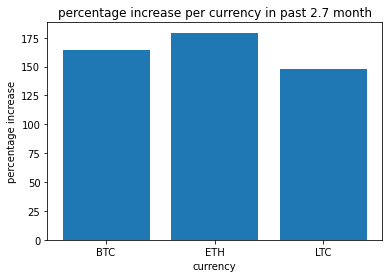

In [18]:
df_perc = df_return.tail(1) * 100
display(df_perc)
plt.bar(df_perc.iloc[0].index, df_perc.iloc[0].values)
plt.xlabel('currency')
plt.ylabel('percentage increase')
plt.title('percentage increase per currency in past 2.7 month');

In the last 2.7 months, the highest percentage of profits is related to ETH, followed by BTC. If at the beginning of this period we bought ETH with all our money, now we have more capital than other currencies.

## How much money would we make?
The amount of money we would make if we invested $1000 a while ago in currencies

,BTC,ETH,LTC
datetime,,,
2021-10-21 11:00:00,1644.448257,1793.601664,1476.500665


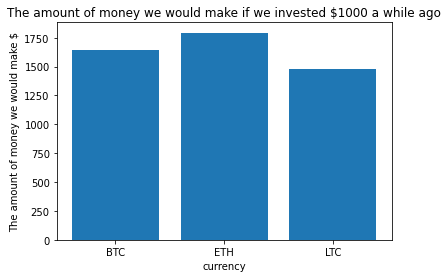

In [19]:
budget = 1000
df_profit = df_return.tail(1) * budget

display(df_profit)
plt.bar(df_profit.iloc[0].index, df_profit.iloc[0].values)
plt.xlabel('currency')
plt.ylabel('The amount of money we would make $')
plt.title('The amount of money we would make if we invested $1000 a while ago');

- The amount of money we would make if we invested \$1000 past 2.7 month in BTC is \$1644.4
- The amount of money we would make if we invested \$1000 past 2.7 month in ETH is \$1793.6
- The amount of money we would make if we invested \$1000 past 2.7 month in LTC is \$1476.5